# Image Processing SoSe 22 - Assignment - 02

### Deadline is 05.05.2022 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.

# Exercise 1 - 4 Points
Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.

In [1]:
import math

def rgb_to_hsv(image):
    """
    Converts the numpy array `x` from RGB to the HSV.
    """
    return np.array([[rgb_to_hsv_pixel_1(y) for y in x] for x in image])

#there are two ways to calculate this.

def rgb_to_hsv_pixel_1(entry):
    r = entry[0]/255
    g = entry[1]/255
    b = entry[2]/255
    c_max_index =  np.argmax([r,g,b])
    c_min_index = np.argmax([r,g,b])
    delta = max(r,g,b) - min(r,g,b)
    hue = -1
    if delta==0:
        hue = 0
    elif c_max_index==0:
        hue = math.degrees(60) * (((g-b)/delta)%6) 
    elif c_max_index==1:
        hue = math.degrees(60) * (((g-b)/delta)+2)
    else :
        hue = math.degrees(60) * (((g-b)/delta)+4)
    if max(r,g,b)==0:
        saturation = 0
    else :
        saturation = delta/max(r,g,b)
    value = max(r,g,b)
    return [hue,saturation,value]

def rgb_to_hsv_pixel_2(entry):
    """
    Converts the pixel from RGB to the HSV.
    """
    r = entry[0]/255
    g = entry[1]/255
    b = entry[2]/255
    c_max =  max([r,g,b])
    c_min = min([r,g,b])
    delta = max(r,g,b) - min(r,g,b)
    hue = -1
    if delta == 0:
        hue = 0
    else:
        if c_max==r:
            segment = (g - b) / delta
            shift   = 0 / 60
            if segment < 0 : 
                shift = 360 / 60
            hue = segment+shift
        elif c_max==g:
            segment = (b - r) / delta
            shift   = 120 / 60
            hue = segment + shift
        else:
            segment = (r - g) / delta
            shift   = 240 / 60
            hue = segment + shift
    hue *= 60
    if max(r,g,b)==0:
        saturation = 0
    else :
        saturation = delta/max(r,g,b)
    value = max(r,g,b)
    return [hue,saturation,value]

In [60]:
def hsv_to_rgb_pixel(entry):
    """
    Converts the numpy array `x` from HSV to the RGB.
    We took the idea for our algorithm from here :  https://en.wikipedia.org/wiki/HSL_and_HSV#HSV_to_RGB
    """
    h = entry[0]
    s = entry[1]
    v = entry[2]
    # chroma 
    c = v * s
    h1 = h/math.degrees(60)
    x = c * (1 - abs(h1 % 2 - 1))
    if h1<1 and h1>=0:
        rgb = [c,x,0]
    elif  h1<2 and h1>=1:
        rgb = [x,c,0]
    elif h1<3 and h1>=2:
        rgb = [0,c,x]
    elif h1<4 and h1>=3:
        rgb = [0,x,c]
    elif h1<5 and h1>=4:
        rgb = [x,0,c]
    else :
        rgb = [c,0,x]
    m = v-c
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    rgb = [(r + m)*255, (g+m)*255, (b+m)*255]
    return rgb

def hsv_to_rgb(image):
    """
    Converts the numpy array `x` from HSB to the RGB.
    """
    return np.array([[hsv_to_rgb_pixel(y) for y in x] for x in image])



Plot the saturation of the astronaut image (see last assignment)

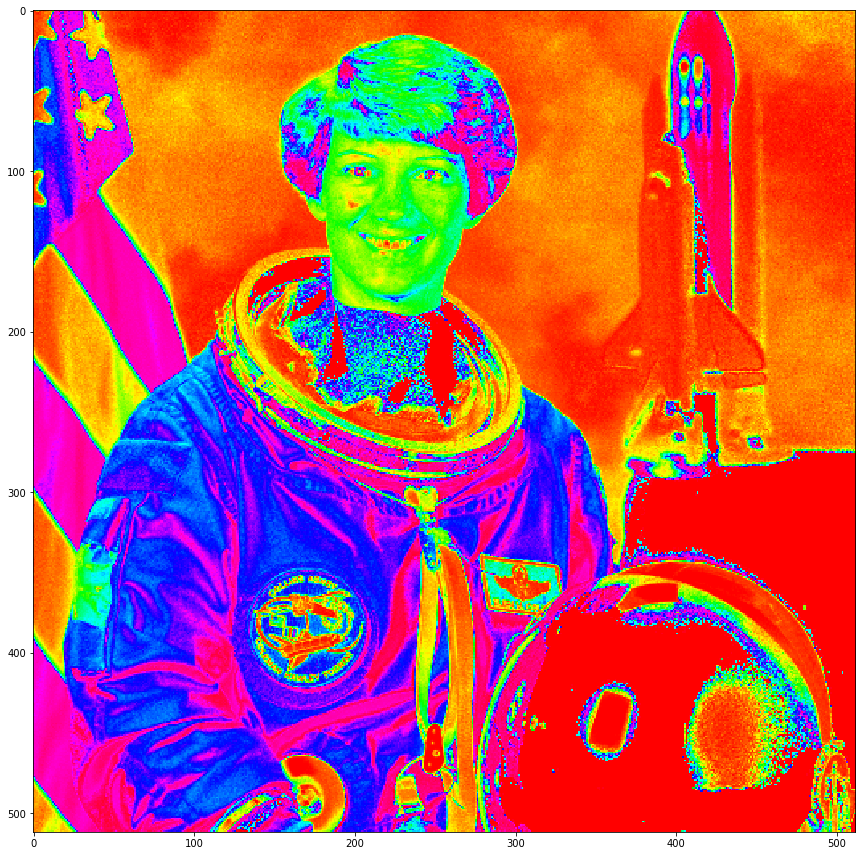

In [61]:
# display the plots inside the notebook
%matplotlib inline
from skimage import io, data, color

import numpy as np
import matplotlib.pyplot as plt
from skimage.data import astronaut
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

img = astronaut() / 255.
img_as_hsv = rgb_to_hsv(img)
# your code, saturation is always the first value
io.imshow(img_as_hsv[...,1],cmap="hsv")

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

In [62]:
img_as_hsv_sat_inc =  np.array([[[y[0],y[1]*2,y[2]] for y in x] for x in img_as_hsv])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


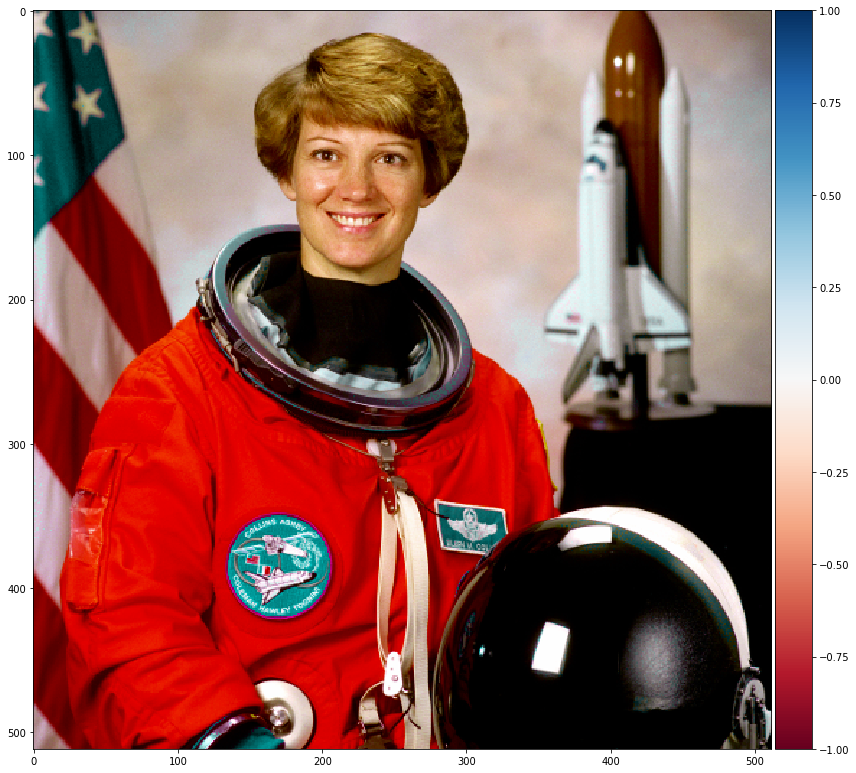

In [64]:
img_rgb_back_converted = hsv_to_rgb(img_as_hsv_sat_inc)
io.imshow(img_rgb_back_converted)

# Exercise 2 - 6 Points

Implement affine transformation with [linear interpolation].
Implement the functions `affine_transformation` and `bilinear_interpolation`. Apply some affine transformation of your choice and smooth the output using your bilinear interpolation.

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [6]:
from skimage.data import astronaut
from skimage.color import rgb2gray

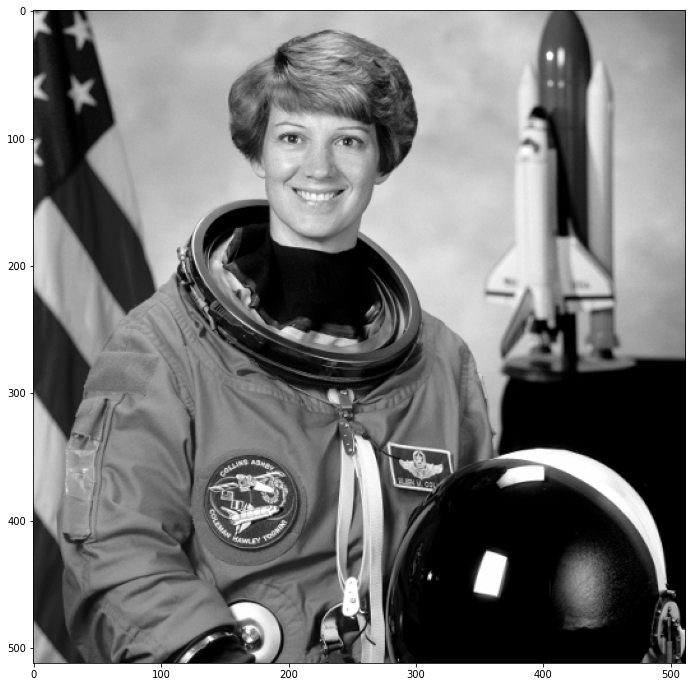

In [7]:
# We use a gray image. All the algorithms should work with color images too.
img = rgb2gray(astronaut() / 255.)
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
def derive_y(image):
    """Computes the derivative of the image w.r.t the y coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y + 1 < image.shape[1] and y - 1 > 0:
                derived_image[x,y] = (image[x, y + 1] - image[x, y - 1]) / 2.0
    return derived_image

def derive_x(image):
    """Computes the derivative of the image w.r.t the x coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + 1 < image.shape[1] and x - 1 > 0:
                derived_image[x,y] = (image[x + 1, y] - image[x - 1, y]) / 2.0
    return derived_image

In [9]:
dx_img = derive_x(img)
dy_img = derive_y(img)

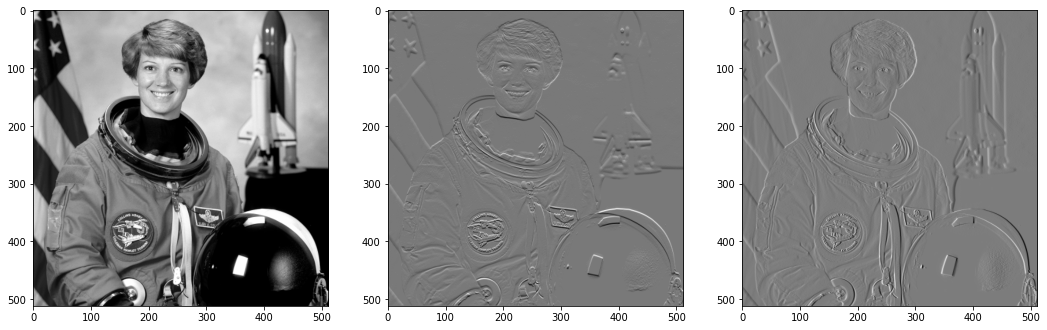

In [10]:
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(dx_img, cmap='gray')
plt.subplot(133)
plt.imshow(dy_img, cmap='gray')
plt.show()

Here are some sample affine transformations to be used later on

In [11]:
T_scale = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1],
])

In [12]:
T_shear = np.array([
    [1, 0.3, 0],
    [0, 1, 0],
    [0, 0, 1],
])

In [13]:
# you can use this function to invert the matricies
np.linalg.inv(T_scale)

array([[1.33333333, 0.        , 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 0.        , 1.        ]])

In [14]:
def affine_transformation(img, matrix):
    # your code here
    # apply bilinear interpolation
    return img

In [15]:
def bilinear_interpolation(img, indicies):
    # your code here

SyntaxError: unexpected EOF while parsing (3034257568.py, line 2)

In [ ]:
img_scale = affine_transformation(img, T_scale)
img_shear = affine_transformation(img, T_shear)

In [ ]:
plt.imshow(img_scale, cmap='gray')
plt.show()

In [ ]:
plt.imshow(img_shear, cmap='gray')
plt.show()